# MPC Final TP : Predicting house prices



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


In [2]:
#Load of the dataset
houses = pd.read_csv('/content/drive/MyDrive/houses.csv', index_col=0)
houses_competition = pd.read_csv('/content/drive/MyDrive/houses_competition.csv', index_col=0)

In [3]:
def my_regression(data, idx_p, idx_t):
    X = data.iloc[:,idx_p] 
    X = sm.add_constant(X) 
    Y = data.iloc[:,idx_t]
    model = sm.OLS(Y, X).fit()
    return(model)

def my_prediction(my_model, data):
    data = sm.add_constant(data)
    indice_p = my_model.model.exog_names
    my_pred = my_model.predict(data.loc[:,indice_p])
    return(my_pred)

def generalization_error_split(train, test, idx_p, idx_t): 
    model = my_regression(train,idx_p,idx_t)
    pred = my_prediction(model,test)
    return np.mean((pred - test['price'])**2)

## 1 Expected work

## 1. A quick statistical study about the dataset : predictive varibales, target variable, link between the variables.

In [4]:
houses

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6681,3.500,3,2.25,1860,8378,2.0,0.0,0.0,3,7,1860,0,1995,0.0,98038,47.3875,-122.032,1870,8378
17798,5.925,4,3.00,2170,8240,1.0,0.0,0.0,4,8,1370,800,1968,0.0,98052,47.6291,-122.093,2020,7944
18854,2.555,2,1.00,1440,43560,1.0,0.0,0.0,4,7,1150,290,1965,0.0,98027,47.4916,-122.082,1870,56628
13478,13.300,4,2.25,3260,4640,2.0,0.0,0.0,5,9,2360,900,1907,0.0,98112,47.6272,-122.312,3240,5800
10509,3.891,2,1.00,840,5400,1.0,0.0,0.0,4,7,840,0,1948,0.0,98118,47.5489,-122.271,1340,5400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16125,2.900,2,1.00,930,7740,1.0,0.0,0.0,3,6,930,0,1924,0.0,98125,47.7091,-122.292,1250,7740
19004,3.150,3,2.50,1730,6368,2.0,0.0,0.0,3,7,1730,0,1993,0.0,98038,47.3505,-122.032,1780,6597
9094,6.850,3,2.50,3450,8000,3.0,0.0,0.0,4,8,2970,480,1927,1975.0,98116,47.5605,-122.402,1880,6135
3537,3.260,6,1.50,1930,8400,1.0,0.0,0.0,3,7,1030,900,1971,0.0,98146,47.4869,-122.340,1780,9520


Here the target variable is the price and the predictive variables are the 18 others, let's see then which variable seems to influence more on the price.

In [5]:
correl = houses.corr()
correl

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.303073,0.526215,0.704557,0.086770,0.258322,0.271284,0.388199,0.032885,0.660685,0.612141,0.313674,0.042693,0.118584,-0.043153,0.308731,0.015186,0.579687,0.077270
bedrooms,0.303073,1.000000,0.509267,0.571693,0.024212,0.177210,-0.007651,0.078406,0.025148,0.348400,0.471838,0.298134,0.150941,0.006457,-0.143536,-0.006336,0.124698,0.382367,0.025264
bathrooms,0.526215,0.509267,1.000000,0.753794,0.085471,0.502906,0.073268,0.181079,-0.130830,0.662106,0.685257,0.276811,0.502930,0.040730,-0.193309,0.032828,0.218211,0.566040,0.078882
sqft_living,0.704557,0.571693,0.753794,1.000000,0.171602,0.357655,0.110436,0.281758,-0.061718,0.760479,0.876076,0.430538,0.308073,0.046095,-0.192286,0.058842,0.234501,0.755616,0.177387
sqft_lot,0.086770,0.024212,0.085471,0.171602,1.000000,-0.005474,0.031144,0.071727,-0.012745,0.112642,0.180854,0.016569,0.056151,0.005450,-0.132934,-0.087623,0.234179,0.154407,0.689165
floors,0.258322,0.177210,0.502906,0.357655,-0.005474,1.000000,0.021685,0.023192,-0.260336,0.457888,0.527336,-0.236999,0.484248,-0.000838,-0.055311,0.056646,0.126496,0.279239,-0.015677
waterfront,0.271284,-0.007651,0.073268,0.110436,0.031144,0.021685,1.000000,0.394502,0.018101,0.084370,0.079613,0.081331,-0.022018,0.086439,0.032304,-0.015820,-0.040387,0.086844,0.031896
view,0.388199,0.078406,0.181079,0.281758,0.071727,0.023192,0.394502,1.000000,0.049515,0.244801,0.169749,0.264069,-0.056035,0.092551,0.090434,0.010416,-0.079501,0.276122,0.071553
condition,0.032885,0.025148,-0.130830,-0.061718,-0.012745,-0.260336,0.018101,0.049515,1.000000,-0.150213,-0.157979,0.160154,-0.367954,-0.063889,0.000621,-0.022898,-0.103214,-0.098219,0.001554
grade,0.660685,0.348400,0.662106,0.760479,0.112642,0.457888,0.084370,0.244801,-0.150213,1.000000,0.754689,0.165835,0.439612,0.013252,-0.180612,0.120379,0.196242,0.713447,0.112836


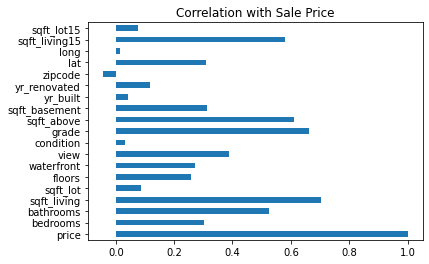

In [6]:
correl['price'].plot(kind = 'barh',title="Correlation with Sale Price", y = correl)

Thanks to the correl function above, we can see that the predictive variables that seems to be more correlated with the price are the sqft_living, grade, sqft_above,sqft_living15, bathrooms and the view. A negative correlation os the view. Let's plot more the graph with the price values with these variables. 

Text(0, 0.5, 'Price')

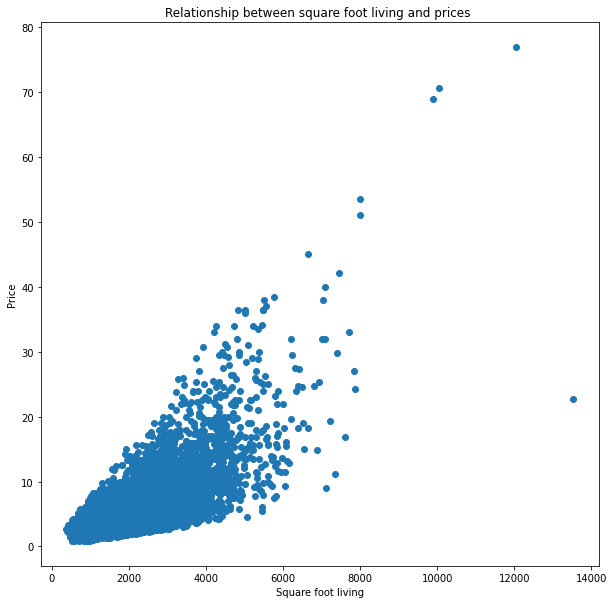

In [7]:
plt.figure(figsize = (10,10))
plt.scatter( houses['sqft_living'],houses['price'])
plt.title("Relationship between square foot living and prices ") 
plt.xlabel("Square foot living") 
plt.ylabel("Price")

This variable seems in reality to influence the price variable.

Text(0, 0.5, 'Price ')

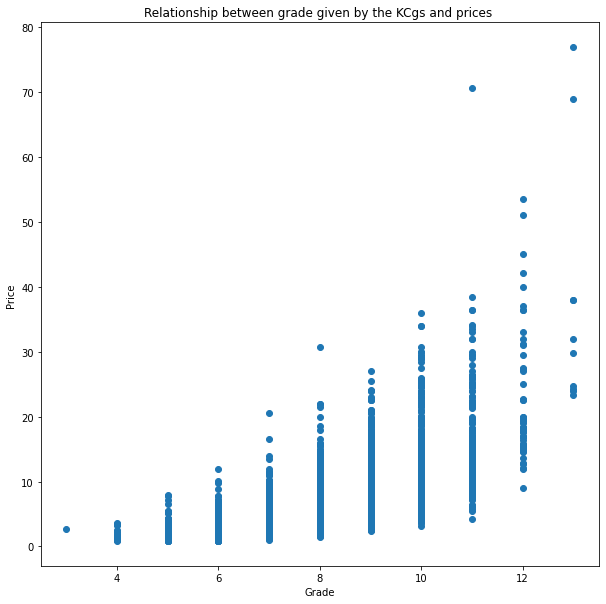

In [8]:
plt.figure(figsize = (10,10))
plt.scatter(houses['grade'],houses['price'])
plt.title("Relationship between grade given by the KCgs and prices ") # give a title to the figure
plt.xlabel("Grade") # give a label to the x-axis
plt.ylabel("Price ")# gives a label to the y-axis

Not explicit but it seems to influence too.

Text(0, 0.5, 'Price')

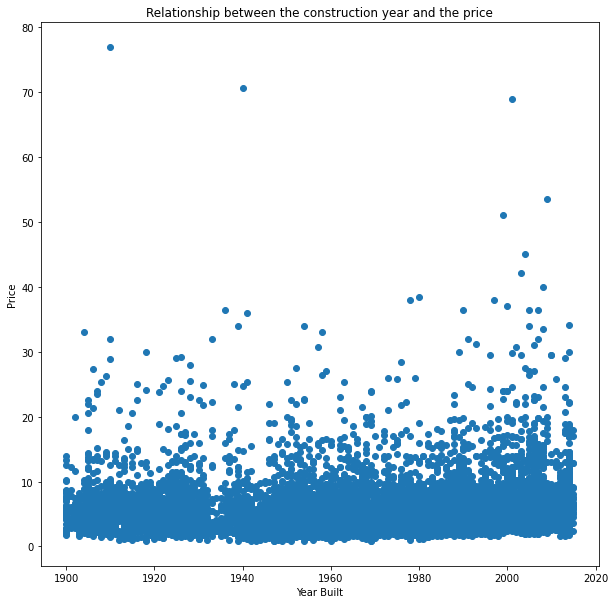

In [9]:
plt.figure(figsize = (10,10))
plt.scatter(houses['yr_built'],houses['price'])
plt.title("Relationship between the construction year and the price") # give a title to the figure
plt.xlabel("Year Built") # give a label to the x-axis
plt.ylabel("Price")# gives a label to the y-axis

It's surprising but the year of construction seems not to influence on the price

Text(0, 0.5, 'Price')

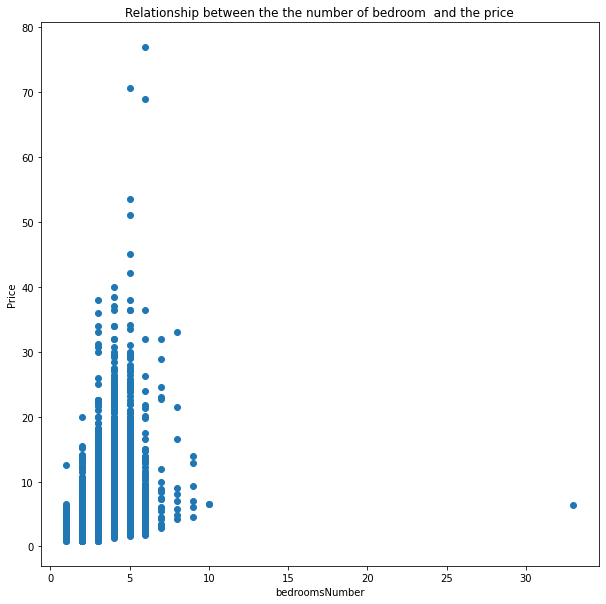

In [10]:
plt.figure(figsize = (10,10))
plt.scatter(houses['bedrooms'],houses['price'])
plt.title("Relationship between the the number of bedroom  and the price") 
plt.xlabel("bedroomsNumber") 
plt.ylabel("Price")

The influence is not proved by this graph.

In [11]:
bins = [0,2,4,6,8,10,15,20,30,40,50,70,80,100]
quartiles = pd.cut(houses.price, bins)
100. * quartiles.value_counts() / len(quartiles)

(2, 4]       36.888856
(4, 6]       30.350078
(6, 8]       15.354184
(8, 10]       6.971710
(10, 15]      4.209898
(0, 2]        3.866537
(15, 20]      1.395835
(20, 30]      0.724043
(30, 40]      0.186609
(50, 70]      0.022393
(70, 80]      0.014929
(40, 50]      0.014929
(80, 100]     0.000000
Name: price, dtype: float64

Here we see that the majority of the prices is between 2 and 8 Millions of euros, a there is a little percentage above 15 Millions€ (less than 3%).

## 2. Simple regression models : you can use only one predictive variable from the 18. You are asked to choose the best one and evaluate its generalization error.

Let's begin with the more correlated variable : sqft_living, we will use the finction defined above 'my_regression'

In [12]:
model_sqliv = my_regression(houses,3,0)
model_sqliv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.320e+04
Date:                Fri, 30 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:50:02   Log-Likelihood:                -32042.
No. Observations:               13397   AIC:                         6.409e+04
Df Residuals:                   13395   BIC:                         6.410e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5466      0.057     -9.646      0.000      -0.658      -0.436
sqft_living     0.0029   2.49e-05    114.907      0.000       0.003       0.003
==============================================================================
Omnibus:                     9718.781   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           441688.826
Skew:                           2.993   Prob(JB):                         0.00
Kurtosis:                      30.485   Cond. No.                     5.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#The critical value is really low sqft_living has an influence on the price, Let's compute R^2 and Ir for this model
Rsq = model_sqliv.rsquared
Ir = np.sum(model_sqliv.resid**2)
"Ir " + str(Ir)," R^2 : " + str(Rsq)

('Ir 93751.78006044973', ' R^2 : 0.49640102806105757')

In [14]:
gen_error_sqliv = np.mean((model_sqliv.predict() - houses["price"])**2)
gen_error_sqliv

6.99796820634842

Now let's compare all the predictive variables, to see if a one can better thanks to the generalization error and the other ratios used above : 

In [15]:
bestrs = 19
maxrs = 0.001 
bestIr = 19
minIr = 800000
bestP = 19
minP = 1

for i in range(1,19):
    model = my_regression(houses,i,0)
    Rsq = model.rsquared
    Ir = np.sum(model.resid**2)
    p = model.pvalues[1]
    if (Rsq>maxrs):
        bestrs = i
        maxrs = Rsq
    if (Ir<minIr):
        bestIr = i
        minIr = Ir
    if (p<minP):
        bestP = i
        minP = p
    

print(bestrs,maxrs,bestIr,minIr,bestP,minP)

3 0.49640102806105757 3 93751.78006044973 2 0.0


Thanks to the loop, we can conclude that the best model is the one that we have already compute, even if it's not the best critical value it is not taken into account, the one from sqft_living is low enough. 
Ir and R^2 are the best for sqft_living! Now we can plot the price by sqft_living and the estimations made by the model.

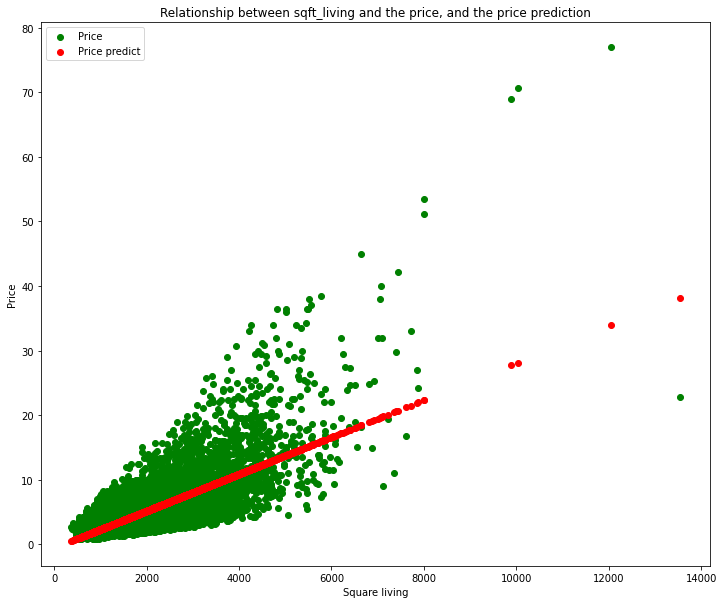

In [16]:
plt.figure(figsize=(12, 10))
plt.scatter(houses["sqft_living"], houses["price"], c = 'green',label = 'Price')
plt.scatter(houses["sqft_living"], model_sqliv.predict(), c = 'red',label = 'Price predict')
plt.title("Relationship between sqft_living and the price, and the price prediction")
plt.xlabel("Square living")
plt.ylabel("Price")
plt.legend(loc = 'best')

## 3. Multiple regression : use the 18 variables to predict the sale price. Estimate the generalization error of this model.

In [17]:
model_mul = my_regression(houses, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], 0)

In [18]:
Rsq_mul = model_mul.rsquared
Ir_mul = np.sum(model_mul.resid**2)
Crit_value = model_mul.pvalues[1]
"Ir : " + str(Ir)," R^2 : " + str(Rsq),"Critical value : " + str(Crit_value)

('Ir : 185052.05498017982',
 ' R^2 : 0.005970611084734623',
 'Critical value : 3.9262069692728446e-52')

Thanks to an higher Ir and a lower R^2, this model is probably less precise than the best with simple regression, let's try the generalisation error : 

In [19]:
gen_error_mul = np.mean((model_mul.predict() - houses["price"])**2)
gen_error_mul

4.192451115975212

The predictions are better with the multiple regression, we can conclude that IR and R^2 are not good ratios to take in account if we are talking about multiple regression. The next plot is the predicted price with all variables, in comparison to the real price taken by the sqft living.

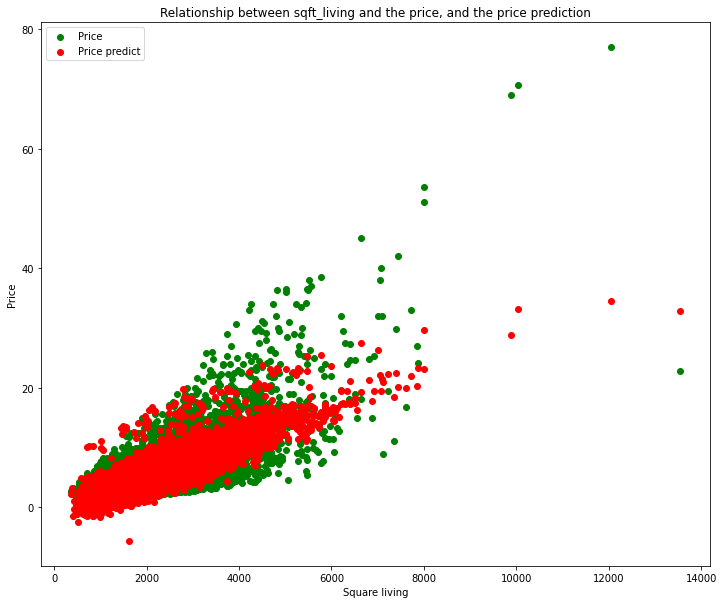

In [20]:
plt.figure(figsize=(12, 10))
plt.scatter(houses["sqft_living"], houses["price"], c = 'green',label = 'Price')
plt.scatter(houses["sqft_living"], model_mul.predict(), c = 'red',label = 'Price predict')
plt.title("Relationship between sqft_living and the price, and the price prediction")
plt.xlabel("Square living")
plt.ylabel("Price")
plt.legend(loc = 'best')

## 4. Variable selection : apply the different variable selection techniques seen during the course to select interesting models. Can you find better models than before ? (according to the estimation of the generalization error)

In [21]:
train , test = train_test_split(houses, test_size = 0.20, random_state = 116)

In [22]:
generalization_error_split(train, test,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], 0)

3.0749539670172696

### Forward Selection

**R^2 criteria :**


In [23]:
def step_selection_adj(train, v_s, v_nu, idx_t):
    res = -1
    perf = 0
    for x in v_nu:
        varT = np.append(v_s, x)
        model = my_regression(train, varT, idx_t)
        if model.rsquared_adj > perf:
            perf = model.rsquared_adj
            res = x

    return(res)

def forward_selection_adj(train, idx_p, idx_t):
    perf = 0
    stop = False
    V_s = []
    while stop == False:
        mod = my_regression(train, V_s, idx_t)
        perf = mod.rsquared_adj
        varResStep = step_selection_adj(train, V_s, idx_p, idx_t)
        V_s = np.append(V_s, varResStep)
        idx_p.remove(varResStep)
        model = my_regression(train, V_s, idx_t)
        if model.rsquared_adj < perf:
            V_s = np.setdiff1d(V_s, varResStep)
            stop = True

    return(V_s)


In [24]:
generalization_error_split(train, test,forward_selection_adj(train,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],0), 0)

3.074397240432445

**Stopping at n+1 criteria**

In [25]:
def forward_selection_adjp1(train, idx_p, idx_t):
    perf = 0
    stop = False
    V_s = []
    while stop == False:
        mod = my_regression(train, V_s, idx_t)
        perf = mod.rsquared_adj
        varResStep = step_selection_adj(train, V_s, idx_p, idx_t)
        V_s = np.append(V_s, varResStep)
        idx_p.remove(varResStep)
        model = my_regression(train, V_s, idx_t)
        
        if model.rsquared_adj < perf:
            mod1 = my_regression(train, V_s, idx_t)
            perf = mod.rsquared_adj
            varResStep = step_selection_adj(train, V_s, idx_p, idx_t)
            V_s = np.append(V_s, varResStep)
            idx_p.remove(varResStep)
            model1 = my_regression(train, V_s, idx_t)
            if model1.rsquared_adj < perf:
                V_s = np.setdiff1d(V_s, varResStep)
                stop = True
    return(V_s)

In [26]:
generalization_error_split(train, test,forward_selection_adjp1(train,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],0), 0)

3.0742209562595453

**IR criteria** 

In [27]:
def step_selection_IR(train, v_s, v_nu, idx_t):
    res = -1
    I_r = 1000000
    for x in v_nu:
        varT = np.append(v_s, x)
        model = my_regression(train, varT, 0)
        if np.sum((model.resid)**2) < I_r:
            I_r = np.sum((model.resid)**2)
            res = x

    return(res)

def forward_selection_IR(train, idx_p, idx_t):
    I_r = 10000000
    stop = False
    varT = []
    V_s = []
    while stop == False:
        mod = my_regression(train, V_s, idx_t)
        I_r = np.sum((mod.resid)**2)
        varResStep = step_selection_IR(train, V_s, idx_p, idx_t)
        V_s = np.append(V_s, varResStep)
        idx_p.remove(varResStep)
        model = my_regression(train, V_s, idx_t)
        if idx_p == [] :
            stop = True
        if np.sum((model.resid)**2) > I_r: 
            V_s = np.setdiff1d(V_s, varResStep)
            stop = True
    return(V_s)

In [28]:
generalization_error_split(train, test,forward_selection_IR(train,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],0), 0)

3.074953967020736

**Generalization error criteria**

In [29]:
def step_selection_gen(train,valid, v_s, v_nu, idx_t):
    res = -1
    perf = 1000
    for x in v_nu:
        varT = np.append(v_s, x)
        if generalization_error_split(train, valid, varT, idx_t)< perf:
            perf = generalization_error_split(train, valid, varT, idx_t)        
            res = x

    return(res)

def forward_selection_gen(train, idx_p, idx_t):
    tr, validation = train_test_split(train, test_size = 0.25, random_state = 4) 
    perf = 13000
    stop = False
    V_s = [] 
    while stop == False:
        perf = generalization_error_split(tr, validation, V_s, idx_t)
        varResStep = step_selection_gen(tr,validation, V_s, idx_p, idx_t)
        V_s = np.append(V_s, varResStep)
        idx_p.remove(varResStep)
        if generalization_error_split(tr, validation, V_s, idx_t)>perf :
            V_s = np.setdiff1d(V_s, varResStep)
            stop = True
    return(V_s)

In [30]:
generalization_error_split(train, test,forward_selection_gen(train,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],0), 0)

3.064190998833649

### Backward Selection

**R^2 criteria :**

In [31]:
def step_selection_adj_bw(train, v_s, idx_t):
    res = []
    perf = 0

    for x in range(len(v_s)):
        varT = np.delete(v_s, x)
        model = my_regression(train, varT, 0) 
        if model.rsquared_adj > perf:
            perf = model.rsquared_adj
            res = varT

    return(res)



def backward_selection_adj(train, idx_p, idx_t):
    perf = 0
    stop = False
    V_s = idx_p
    while stop == False:
        mod = my_regression(train, V_s, idx_t)
        perf = mod.rsquared_adj
        varResStep = step_selection_adj_bw(train, V_s, idx_t)
        V_s = varResStep
        model = my_regression(train, V_s, idx_t)
        if model.rsquared_adj < perf:
            V_s = varResPrevStep
            stop = True
        else:
            perf = model.rsquared_adj
            varResPrevStep = varResStep
            
    return(V_s)

In [32]:
generalization_error_split(train, test,backward_selection_adj(train,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],0), 0)

3.074397240432445

**Stopping at n+1 criteria**

In [33]:
def backward_selection_adjp1(train, idx_p, idx_t):
    perf = 0
    stop = False
    V_s = idx_p
    while stop == False:
        mod = my_regression(train, V_s, idx_t)
        perf = mod.rsquared_adj
        varResStep = step_selection_adj_bw(train, V_s, idx_t)
        V_s = varResStep
        model = my_regression(train, V_s, idx_t)
        if model.rsquared_adj < perf:
            mod1 = my_regression(train, V_s, idx_t)
            perf = mod.rsquared_adj
            varResStep = step_selection_adj_bw(train, V_s, idx_t)
            V_s = varResStep
            model1 = my_regression(train, V_s, idx_t)
            if model1.rsquared_adj < perf:
                V_s = varResPrevStep
                stop = True
            else : 
                perf = model.rsquared_adj
                varResPrevStep = varResStep
        else:
            perf = model.rsquared_adj
            varResPrevStep = varResStep
            
    return(V_s)


In [34]:
generalization_error_split(train, test,backward_selection_adjp1(train,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],0), 0)

3.074397240432445

**IR criteria** 

In [35]:
def step_backward_selection_IR_bw(train, v_s, idx_t):
    res = []
    I_r = 1000000

    for x in range(len(v_s)):
        varT = np.delete(v_s, x)
        model = my_regression(train, varT, 0)
        if np.sum((model.resid)**2) < I_r:
            I_r = np.sum((model.resid)**2)
            deleted = x + 1
            res = varT

    return(res)

def backward_selection_IR(train, idx_p, idx_t):
    I_r = 1000000
    stop = False
    V_s = idx_p
    while stop == False:
        mod = my_regression(train, V_s, idx_t)
        I_r = np.sum((mod.resid)**2)
        varResStep = step_backward_selection_IR_bw(train, V_s, idx_t)
        V_s = varResStep
        model = my_regression(train, V_s, idx_t) 
        if np.sum((model.resid)**2) > I_r:
            stop = True
        else:
            I_r = np.sum((model.resid)**2)
    
    return(V_s)

In [36]:
generalization_error_split(train, test,backward_selection_IR(train,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],0), 0)

3.074855972684711

**Generalization error criteria**

In [37]:
def step_selection_gen_bw(train,valid, v_s, v_nu, idx_t):
    res = -1
    perf = 1000
    for x in range(len(v_s)):
        varT = np.delete(v_s, x)
        if generalization_error_split(train, valid, varT, idx_t)< perf:
            perf = generalization_error_split(train, valid, varT, idx_t)        
            res = varT
    return(res)

def backward_selection_gen(train, idx_p, idx_t):
    tr, validation = train_test_split(train, test_size = 0.25, random_state = 4) 
    perf = 13000
    stop = False
    V_s = idx_p
    while stop == False:
        perf = generalization_error_split(tr, validation, V_s, idx_t)
        varResStep = step_selection_gen_bw(tr,validation, V_s, idx_p, idx_t)
        V_s = varResStep
        if generalization_error_split(tr, validation, V_s, idx_t)>perf :
            stop = True
    return(V_s)

In [38]:
generalization_error_split(train, test,backward_selection_gen(train,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],0), 0)

3.065900262931791

## 5. Non-linear models : add some non-linear variables (that you can couple with variable selection techniques) to try to design more accurate models.




In [39]:
def add_polynomial_feature(data, idx_p, power):
    new_data = data.copy(deep = True)
    for i in range(0, len(idx_p)):
        for j in power:
            for k in range(2, j+1):
                new_data['{}_pow_{}'.format(new_data.columns[idx_p[i]],k)] = new_data.iloc[:,idx_p[i]]**k
    return(new_data)

In [40]:
forward_selection_gen(train,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],0)

array([ 1.,  2.,  3.,  5.,  6.,  7.,  8.,  9., 11., 12., 14., 15., 16.,
       17.])

In [41]:
#result of our best test selection!
train_house = add_polynomial_feature(train,[ 1,  2,  3,  5,  6,  7,  8,  9, 11, 12, 14, 15, 16,17], [2,3,4,5,6,7,8,9])
test_house = add_polynomial_feature(test, [ 1,  2,  3,  5,  6,  7,  8,  9, 11, 12, 14, 15, 16,17], [2,3,4,5,6,7,8,9])
#forward_selection_gen(train,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],0)
train_house
l=[]
for i in range (1,130):
    l.append(i)
generalization_error_split(train_house, test_house,forward_selection_gen(train_house,l,0),0)

2.2774530851418024